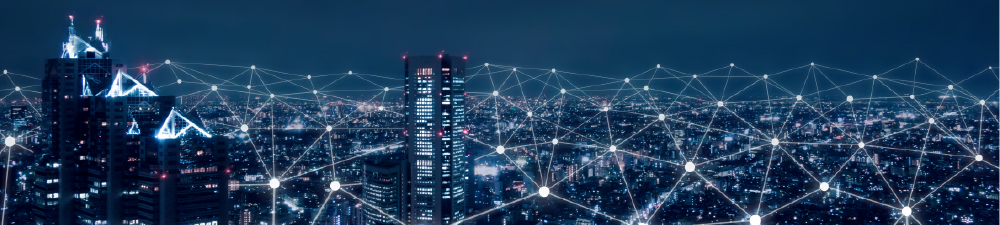

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("C:/Users/Siti/Desktop/Siti/RISE_BCG/Machine Learning/Mini_project_3_Data.xls")

## Exercise

## Placeholder for your analysis

(51047, 58)

<Figure size 864x720 with 0 Axes>

Text(0.5, 1, 'Correlation of Numeric Features')

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

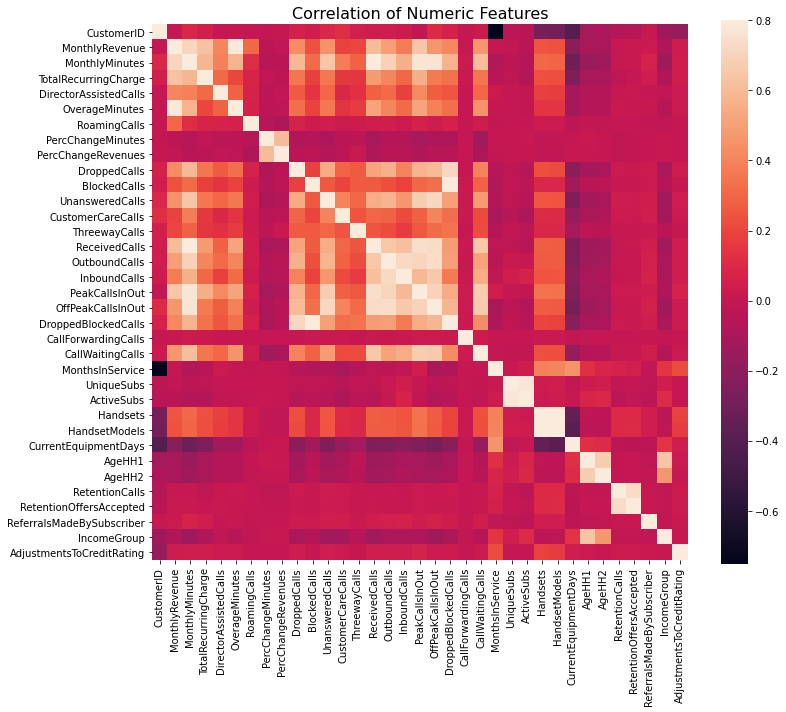

(51047, 55)

In [3]:
# Type your code here to explore and understand the data better
cust_df.shape
#correlation
correlation = cust_df.corr()
plt.figure(figsize=(12,10))
plt.title("Correlation of Numeric Features", y=1, size=16)
sns.heatmap(correlation, square= True, vmax=0.8)
plt.show()
# Drop correlated variables
# correlation["Handsets"].sort_values(ascending=False)*100
cust_df.drop(['Handsets','DroppedBlockedCalls','ReceivedCalls'], axis=1, inplace=True)
#e.g., identify the dimension of cust_df
cust_df.shape

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [4]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
zero_revenue = len(cust_df[cust_df.MonthlyRevenue == 0])
print('Amount of customers with 0 monthly revenue: ',zero_revenue)

Amount of customers with 0 monthly revenue:  6


### Q1.2 How many columns has missing values percentage > 5%

In [5]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
percent = (cust_df.isnull().sum()/ len(cust_df))*100
print('There are',(percent > 5).sum(), 'column with more than 5% of missing values')

There are 0 column with more than 5% of missing values


<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
<mark>Missing values can be replaced with the mean of the column. Missing values are detected using isnull() function then imputing the mean to the variable.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

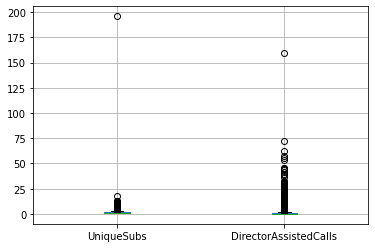

In [6]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [7]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
Q1 = cust_df[cols].quantile(0.25)
Q3 = cust_df[cols].quantile(0.75)
IQR = Q3-Q1 #IQR is interquartile range. 
filter = cust_df[~((cust_df[cols] < (Q1 - 1.5 * IQR)) | (cust_df[cols] > (Q3 + 1.5 *IQR))).any(axis=1)]

<AxesSubplot:>

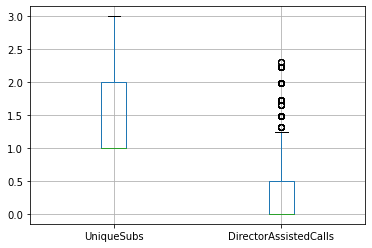

In [8]:
#After filtering outlier
cols=["UniqueSubs","DirectorAssistedCalls"]
filter.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

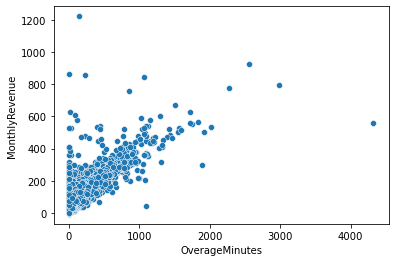

In [9]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
<mark>Yes, customer with high overage minutes will contribute to high revenue. We can see an increasing trend in monthly revenue as the overage minutes increases.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

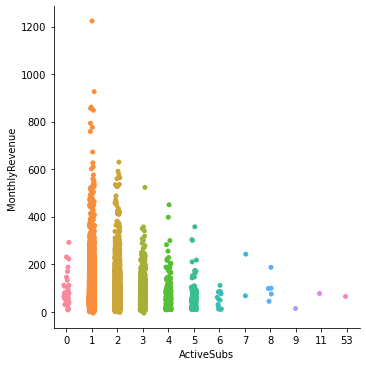

In [10]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data =cust_df) 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    
<mark>Yes, there is a decreasing trend of monthly revenue as the active subscribers increases. Majority of the revenue comes from lesser subscribers. Therefore, high number of active subscribers lead to low monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

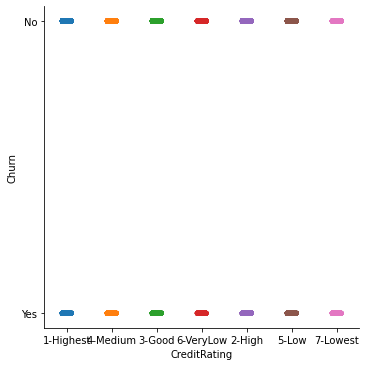

In [11]:
sns.catplot(x = 'CreditRating', y = 'Churn', data =cust_df )

<mark>__Result:__
    
Type your interpretation here based on the analysis above
 
<mark>No, credit rating does not impact churn rate as there is no trend shown in the graph.

### Placeholder for additional exploratory analysis

In [12]:
#type your code here for any additional exploratory analysis (if any)
cust_df = cust_df.replace(np.nan, 0)
cust_df.replace(np.nan, 0, inplace=True)
#Replace 'Unknown' to zero for HandsetPrice & convert to int
cust_df['HandsetPrice'].replace('Unknown', 0 ,inplace = True)
cust_df['HandsetPrice'] = pd.to_numeric(cust_df['HandsetPrice'])
cust_df.info()
cust_df.select_dtypes(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,No,Yes,1-Highest,Suburban,Professional,No
1,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,Yes,No,No,No,4-Medium,Suburban,Professional,Yes
2,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,No,Yes,Yes,No,No,No,3-Good,Town,Crafts,Yes
3,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,No,Yes,Yes,No,No,No,4-Medium,Other,Other,No
4,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,Yes,No,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,...,No,Yes,No,No,No,No,1-Highest,Suburban,Other,Yes
51043,No,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,No,No,3-Good,Other,Other,No
51044,Yes,LAXCDG310,No,No,Yes,No,No,Known,No,No,...,No,Yes,No,No,No,No,5-Low,Other,Clerical,No
51045,No,NEVPOW619,Yes,No,Yes,No,No,Unknown,No,No,...,No,No,No,No,No,No,5-Low,Other,Other,No


## Q3. Create additional features to help predict churn

In [13]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minutes']= cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [14]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [15]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Encode categorical variable with ordinal encoding
cols = ('Churn','ServiceArea','ChildrenInHH','HandsetRefurbished',
        'HandsetWebCapable','TruckOwner','RVOwner','Homeownership',
        'BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',
        'NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser',
        'NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam',
        'CreditRating','PrizmCode','Occupation','MaritalStatus')
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(cust_df[c].values))
    cust_df[c]= lbl.transform(list(cust_df[c].values))

#Define columns to be included in X and y
X = cust_df.drop(['Churn'], axis=1)
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)
y = cust_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

StandardScaler()

StandardScaler()

In [16]:
# X
# y
# cust_df

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35732, 57), (15315, 57), (35732,), (15315,))

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [18]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import binarize

In [19]:
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train, y_train)
# # prediction = logisticRegr.predict(X_test)
# logisticRegr.predict_proba(X_test)

In [20]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
prediction = logisticRegr.predict(X_test)
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Keep probabilities for the positive outcome only
churners = logisticRegr.predict_proba(X_test)[:,1]
churners = churners.reshape(1, -1) # Reshape from 1D to 2D array
prediction = binarize(churners,0.5)[0] # It will return 1 for all values above 0.5 and 0 otherwise

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
confusion
print(metrics.classification_report(y_test,prediction))  
TP = confusion[1, 1] #Predicted True and True in reality.
TN = confusion[0, 0] #Predicted False and False in reality.
FP = confusion[0, 1] #Predicted True and False in reality.
FN = confusion[1, 0] #Predicted False and True in reality.
accuracy = (TP + TN) / float(TP + TN + FP + FN) # metrics.accuracy_score(y_test, prediction)
print('Accuracy : %.2f%%' % (accuracy*100))
precision = TP / float(TP + FP) # metrics.precision_score(y_test, prediction)
print('Precision : %.2f%%' % (precision*100)) 
recall = TP / float(FN + TP) # metrics.recall_score(y_test, prediction)
print('Recall : %.2f%%' % (recall*100)) 
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
auc = metrics.auc(fpr, tpr)
# auc = metrics.roc_auc_score(y_test, prediction)
print('AUC : %.2f%%' % (auc*100))
gini= 2 * auc - 1
print('GINI Coefficient : ',gini)

LogisticRegression()

array([[10821,   154],
       [ 4187,   153]], dtype=int64)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10975
           1       0.50      0.04      0.07      4340

    accuracy                           0.72     15315
   macro avg       0.61      0.51      0.45     15315
weighted avg       0.66      0.72      0.62     15315

Accuracy : 71.66%
Precision : 49.84%
Recall : 3.53%
AUC : 51.06%
GINI Coefficient :  0.021221565560605837


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [21]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier

#Instantiate the classifier
rfc = RandomForestClassifier()

In [22]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
churners = rfc.predict_proba(X_test)[:,1]
churners = churners.reshape(1, -1) # Reshape from 1D to 2D array
y_pred = binarize(churners,0.5)[0] # It will return 1 for all values above 0.5 and 0 otherwise


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

confusion = metrics.confusion_matrix(y_test, y_pred)
confusion
print(metrics.classification_report(y_test,y_pred))  
TP = confusion[1, 1] #Predicted True and True in reality.
TN = confusion[0, 0] #Predicted False and False in reality.
FP = confusion[0, 1] #Predicted True and False in reality.
FN = confusion[1, 0] #Predicted False and True in reality.
accuracy = (TP + TN) / float(TP + TN + FP + FN) # metrics.accuracy_score(y_test, y_pred)
print('Accuracy : %.2f%%' % (accuracy*100))
precision = TP / float(TP + FP) # metrics.precision_score(y_test, y_pred)
print('Precision : %.2f%%' % (precision*100)) 
recall = TP / float(FN + TP) # metrics.recall_score(y_test, y_pred)
print('Recall : %.2f%%' % (recall*100)) 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
# auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC : %.2f%%' % (auc*100))
gini= 2 * auc - 1
print('GINI Coefficient : ',gini)

RandomForestClassifier()

array([[10668,   307],
       [ 3966,   374]], dtype=int64)

              precision    recall  f1-score   support

           0       0.73      0.97      0.83     10975
           1       0.55      0.09      0.15      4340

    accuracy                           0.72     15315
   macro avg       0.64      0.53      0.49     15315
weighted avg       0.68      0.72      0.64     15315

Accuracy : 72.10%
Precision : 54.92%
Recall : 8.62%
AUC : 52.91%
GINI Coefficient :  0.058202450059309685


<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
   
<mark>Random forest classifier model has better accuracy and confusion matrix is used.

### Q4.3 Identify most important features impacting churn

In [23]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

features = pd.Series(rfc.feature_importances_, index=X.columns)
top_20_features = features.sort_values(ascending=False)[:20]
print('Top 20 features impacting churn')
print(top_20_features)

Top 20 features impacting churn
CurrentEquipmentDays     0.054669
PercChangeMinutes        0.047510
MonthlyMinutes           0.046582
CustomerID               0.046085
perc_recurrent_charge    0.042459
MonthlyRevenue           0.039640
PercChangeRevenues       0.039590
ServiceArea              0.039489
MonthsInService          0.037596
OffPeakCallsInOut        0.036020
PeakCallsInOut           0.035495
UnansweredCalls          0.034578
OutboundCalls            0.032898
DroppedCalls             0.030078
TotalRecurringCharge     0.027233
BlockedCalls             0.026919
AgeHH1                   0.026195
InboundCalls             0.026100
perc_overage_minutes     0.025625
OverageMinutes           0.021741
dtype: float64


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [24]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4
df=pd.read_csv('C:/Users/Siti/Desktop/Siti/RISE_BCG/Machine Learning/Mini_project_3_Hold_Out_Data.xls')
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,...,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [25]:
# Drop correlated variables
df.drop(['Handsets','DroppedBlockedCalls','ReceivedCalls'], axis=1, inplace=True)
df = create_features(df)
df['HandsetPrice'].replace('Unknown', 0 ,inplace = True)
df['HandsetPrice'] = pd.to_numeric(cust_df['HandsetPrice'])
df.info()
df.select_dtypes(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,MILMIL414,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,...,No,Yes,No,Yes,No,No,5-Low,Other,Other,No
1,NNYSYR315,No,No,Yes,No,No,Known,No,No,No,...,Yes,Yes,Yes,No,No,No,1-Highest,Other,Professional,No
2,MILMIL414,No,No,No,No,No,Unknown,No,No,No,...,No,No,Yes,No,No,No,3-Good,Suburban,Crafts,Yes
3,SLCSLC801,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,...,No,Yes,No,Yes,No,No,1-Highest,Other,Other,No
4,OKCTUL918,No,No,Yes,No,No,Known,Yes,Yes,No,...,No,Yes,No,Yes,No,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,LAXVNY818,No,No,Yes,No,No,Unknown,No,No,No,...,No,Yes,No,No,No,No,1-Highest,Other,Other,Unknown
19996,LAXRIV909,No,No,Yes,No,No,Known,No,No,No,...,Yes,Yes,No,No,No,No,1-Highest,Suburban,Other,Yes
19997,LAXCOR909,No,No,Yes,No,No,Unknown,No,No,No,...,No,Yes,Yes,No,No,No,1-Highest,Suburban,Other,No
19998,LAXLAG949,No,No,Yes,No,No,Unknown,No,No,No,...,No,Yes,No,No,No,No,3-Good,Other,Other,Unknown


In [26]:
cols = ('ServiceArea','ChildrenInHH','HandsetRefurbished',
        'HandsetWebCapable','TruckOwner','RVOwner','Homeownership',
        'BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',
        'NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser',
        'NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam',
        'CreditRating','PrizmCode','Occupation','MaritalStatus')
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]= lbl.transform(list(df[c].values))

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [27]:
X2 = cust_df.drop(['Churn'],axis=1)
X2[X2==np.inf]=np.nan
X2.fillna(0, inplace=True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2=sc.fit_transform(X2)

In [28]:
#Use "predict" function on the transformend data using the best fitted model object
pd.DataFrame(rfc.predict(X2))
pd.DataFrame(rfc.predict(X2)).loc[20:30] # read from index 20 to 30

,0
0,1
1,0
2,0
3,0
4,1
...,...
51042,1
51043,0
51044,1
51045,0


,0
20,0
21,0
22,0
23,0
24,0
25,1
26,0
27,0
28,0
29,1


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

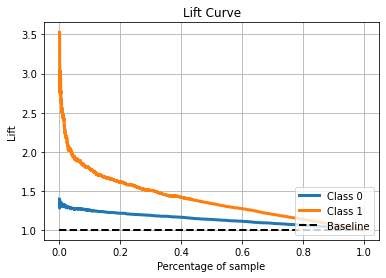

In [29]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, rfc.predict_proba(X_test))

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?<mark> If top 20% of high risk customers are targetted, the lift will be 1.7.
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   